In [158]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [148]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [149]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [150]:
df2 = df.set_index('Day')

In [151]:
average_year = df2['t'].resample('Y').median()
print("самый теплый год: ", average_year.idxmax().strftime('%Y'))
print("самый холодный год: ", average_year.idxmin().strftime('%Y'))

самый теплый год:  2008
самый холодный год:  2009


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [204]:
january = df2.loc[(df2.index.month == 1)&(df2['t']>=0)]
january.resample('Y').count().idxmax().t.strftime('%Y')

'2008'

**3.** В каком году было самое холодное лето (по средней температуре)

In [210]:
summer = df2.loc[(df2.index.month == 6)|(df2.index.month == 7)|(df2.index.month == 8)]
summer.resample('Y').median().idxmin().t.strftime('%Y')

'2008'

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [222]:
df2['$\Delta$ t'] = abs(df2['t'] - df2['t'].shift(1))
df2['$\Delta$ t'].idxmax()

Timestamp('2014-05-27 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

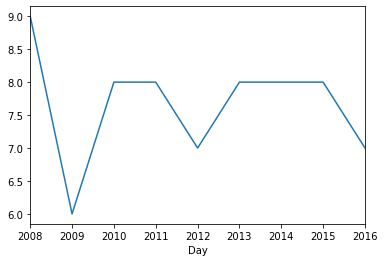

In [157]:
average_year = df2['t'].resample('Y').median().plot()